In [21]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K
from keras.datasets import mnist

import numpy as np
import tensorflow as tf

In [22]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)

In [23]:
(x_train, _), (x_test, _) = mnist.load_data()

In [24]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [25]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

In [26]:
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [27]:
input_img = Input(shape = (28, 28, 1))

In [28]:
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2,2), padding='same')(x)
x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2,2), padding='same')(x)

In [29]:
x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2,2))(x)
x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = UpSampling2D((2,2))(x)
decoded = Conv2D(1,(3,3), activation='sigmoid', padding='same')(x)

In [30]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [31]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [32]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [33]:
autoencoder.fit(x_train_noisy, x_train, 
                epochs=100, 
                batch_size=128, 
                shuffle=True, 
                validation_data=(x_test_noisy,x_test))

Epoch 1/100
469/469 [==============================] - 4s 9ms/step - loss: 0.1736 - val_loss: 0.1174
Epoch 2/100
469/469 [==============================] - 4s 9ms/step - loss: 0.1146 - val_loss: 0.1100
Epoch 3/100
469/469 [==============================] - 4s 8ms/step - loss: 0.1090 - val_loss: 0.1061
Epoch 4/100
469/469 [==============================] - 4s 9ms/step - loss: 0.1055 - val_loss: 0.1031
Epoch 5/100
469/469 [==============================] - 4s 9ms/step - loss: 0.1030 - val_loss: 0.1012
Epoch 6/100
469/469 [==============================] - 4s 8ms/step - loss: 0.1014 - val_loss: 0.0998
Epoch 7/100
469/469 [==============================] - 4s 9ms/step - loss: 0.1003 - val_loss: 0.0994
Epoch 8/100
469/469 [==============================] - 4s 9ms/step - loss: 0.0996 - val_loss: 0.0982
Epoch 9/100
469/469 [==============================] - 5s 10ms/step - loss: 0.0989 - val_loss: 0.0978
Epoch 10/100
469/469 [==============================] - 4s 9ms/step - loss: 0.0985 - val_l

469/469 [==============================] - 4s 8ms/step - loss: 0.0934 - val_loss: 0.0933
Epoch 82/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0934 - val_loss: 0.0934
Epoch 83/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0934 - val_loss: 0.0934
Epoch 84/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0934 - val_loss: 0.0933
Epoch 85/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0934 - val_loss: 0.0932
Epoch 86/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0933 - val_loss: 0.0933
Epoch 87/100
469/469 [==============================] - 4s 9ms/step - loss: 0.0933 - val_loss: 0.0933
Epoch 88/100
469/469 [==============================] - 4s 9ms/step - loss: 0.0933 - val_loss: 0.0933
Epoch 89/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0934 - val_loss: 0.0933
Epoch 90/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0933 - val_loss: 

In [34]:
decoded_imgs = autoencoder.predict(x_test_noisy)

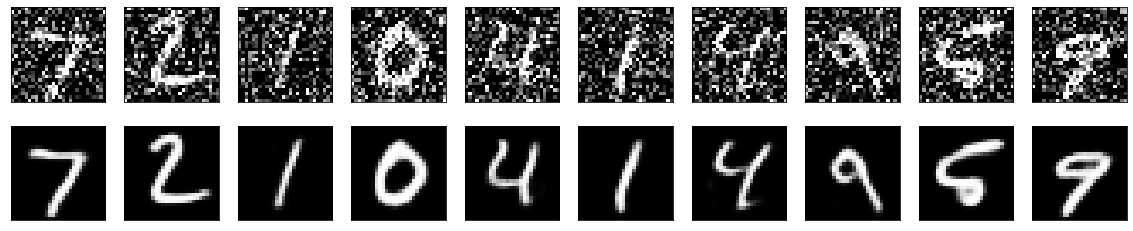

In [35]:
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  #display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test_noisy[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  #display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)